<a href="https://colab.research.google.com/github/MaxZx3000/Heart-Disease/blob/main/Assignment_1_Indonesia_AI_(Anthony_Kevin_Oktavius).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Deep Learning

Dibuat oleh: Anthony Kevin Oktavius

In [22]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display

**Membuat Matplotlib menggunakan SVG untuk Menampilkan Gambar**

SVG adalah singkatan dari Scalable Vector Graphics. SVG adalah format gambar berbasis vektor. Ketika menggunakan SVG, gambar akan ditampilkan dalam resolusi yang lebih tinggi dibandingkan dengan JPEG.

Akan tetapi, matplotlib menggunakan JPEG untuk menampilkan gambar. Untuk menggunakan SVG, kita bisa menggunakan fungsi dari IPython bernama set_matplotlib_formats('svg')


In [9]:
display.set_matplotlib_formats('svg')

## Data Loading

Inisialisasi Field yang akan digunakan

In [12]:
age_field = "age"
sex_field = "sex"
cp_field = "cp"
trestbps_field = "trestbps"
chol_field = "chol"
fbs_field = "fbs"
restecg_field = "restecg"
thalach_field = "thalach"
exang_field = "exang"
oldpeak_field = "oldpeak"
slope_field = "slope"
ca_field = "ca"
thal_field = "thal"
num_field = "num"

Mengunduh Dataset dan Inisialisasi nama kolom

In [17]:
dataset_column_names = [age_field, sex_field, cp_field, 
                        trestbps_field, chol_field, fbs_field, 
                        restecg_field, thalach_field, exang_field,
                        oldpeak_field, slope_field, ca_field,
                        thal_field, num_field]

dataset_link = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

cleveland_df = pd.read_csv(dataset_link, names = dataset_column_names)
cleveland_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


Membagi field-field ke dalam numerikal dan kategorikal.

In [20]:
categorical_variables = [sex_field, cp_field, fbs_field, restecg_field,
                         exang_field, slope_field, ca_field, thal_field, 
                         num_field]

numerical_variables = [age_field, trestbps_field, chol_field, trestbps_field, 
                       chol_field, thalach_field, oldpeak_field]

Melihat Info Data pada Dataset Kita.

In [18]:
cleveland_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


Melihat Data Statistika pada Dataset Kita

In [19]:
cleveland_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


## Data Visualization

### Single Variable

Box Plot - Comparison

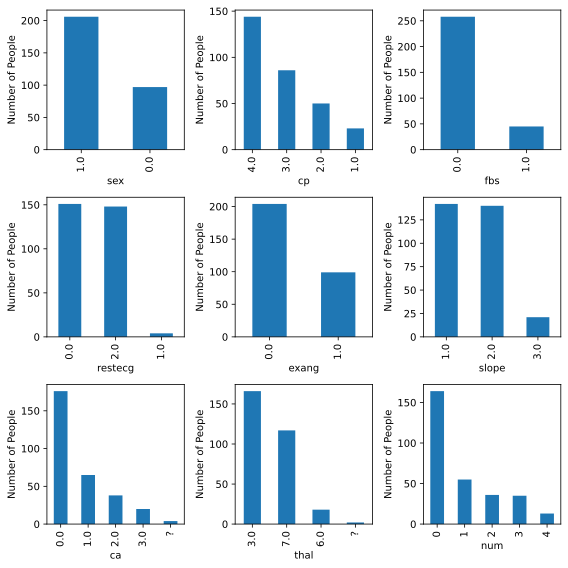

In [33]:
for index, feature in enumerate(categorical_variables):
  plt.subplot(3, 3, index + 1)
  plt.xlabel(feature)
  plt.ylabel("Number of People")
  
  cleveland_df[feature].value_counts().plot(kind = 'bar', figsize = (8, 8))

plt.tight_layout()
plt.show()

### Two Variables

### Multiple Variables